In [72]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import Image 

In [20]:
df = pd.read_csv("train.csv")

In [21]:
def fill_missing(df):
    
    df['LotFrontage'].fillna(0,inplace=True)
    df['Alley'].fillna('NA',inplace=True)
    df['MasVnrArea'].fillna(0,inplace=True)
    df['MasVnrType'].fillna('None',inplace=True)
    df['BsmtQual'].fillna('NA',inplace=True)
    df['BsmtCond'].fillna('NA',inplace=True)
    df['BsmtExposure'].fillna('NA',inplace=True)
    df['BsmtFinType1'].fillna('NA',inplace=True)
    df['BsmtFinType2'].fillna('NA',inplace=True)
    df['Electrical'].fillna('FuseA',inplace=True)
    df['FireplaceQu'].fillna('NA',inplace=True)
    df['GarageType'].fillna('NA',inplace=True)

    # Remove column
    #df['GarageYrBlt'].fillna('None',inplace=True)

    df['GarageFinish'].fillna('NA',inplace=True)
    df['GarageQual'].fillna('NA',inplace=True)
    df['GarageCond'].fillna('NA',inplace=True)
    df['PoolQC'].fillna('NA',inplace=True)
    df['Fence'].fillna('MnWw',inplace=True)
    df['MiscFeature'].fillna('NA',inplace=True)
    
    return df

In [103]:
def linear_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #print X_train.shape, X_test.shape, y_train.shape, y_test.shape
#     regr = linear_model.LinearRegression()

    regr = Lasso()
    
    #fit model
    regr.fit(X_train, y_train)
    
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual_SalePrice','Predicted_SalePrice'])
    
    plot_actual_predicted(actvspred_df)
    
    #print actvspred_df
    
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    #print('Variance score: %.2f' % regr.score(X_test, y_test))
    
    #plot_coeffs(regr.coef_,feature_names,"Lasso")

def plot_coeffs(coeffs,feature_names,model_name):
    
    coeff = pd.Series(coeffs,index = feature_names )
    imp_coef = pd.concat([coeff.sort_values().head(10),
                     coeff.sort_values().tail(10)])
    
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")

    plt.title("Coefficients in the "+model_name+" Model")

In [108]:
def plot_actual_predicted(df):
    
    g = sns.jointplot( "Predicted_SalePrice","Actual_SalePrice", data=df, kind="reg")

In [109]:
def vectorize(df):
    
    data = df.to_dict(orient='records')
    
    vec = DictVectorizer()
    
    vec_data = vec.fit_transform(data).toarray()
    
    return vec,vec_data

In [110]:
def preprocessing(df):
    
    train = df.columns.tolist()
    
    train.remove('SalePrice')
    
    train.remove('Id')
    
    train.remove('GarageYrBlt')
    
#     train.remove('Alley')
    
#     train.remove('BsmtQual')
    
#     train.remove('BsmtCond')
    
#     train.remove('BsmtExposure')
    
#     train.remove('BsmtFinType1')
    
#     train.remove('BsmtFinType2')
    
#     train.remove('GarageFinish')
    
#     train.remove('GarageQual')
    
#     train.remove('GarageCond')
    
#     train.remove('PoolQC')
    
#     train.remove('Fence')
    
#     train.remove('FireplaceQu')
    
#     train.remove('MiscFeature')
    
    train_df = df[train]
    
    #print len(train_df.columns)
    target_df = df['SalePrice']
    
    vec,train = vectorize(train_df)
    
    return vec,train

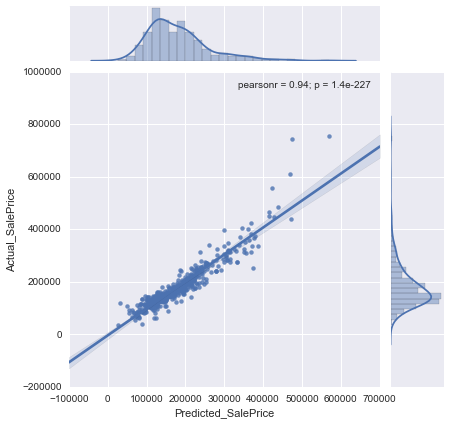

In [111]:
new_df = fill_missing(df)

vec,train = preprocessing(new_df)
target = new_df['SalePrice']

linear_regr(train,target,vec.get_feature_names())

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

new_df = fill_missing(df)

vec,train = preprocessing(new_df)
target = new_df['SalePrice']

def kfold_crossvalidation(train,target,feature_names):
    
    X = train
    y = target
    
    scores = list()
    scores_std = list()
    
    rng = np.random.RandomState()
    regr = AdaBoostRegressor(Lasso,
                                  n_estimators=300, random_state=rng)
    #regr = DecisionTreeRegressor(max_depth=6)
                            
    #regr.fit(X_train, y_train)
    
    n_folds = 10
    
#   regr = linear_model.LinearRegression()

    lasso = Lasso(random_state=0)

    this_scores = cross_val_score(lasso, X, y, cv=n_folds, n_jobs=1)
    print this_scores
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

    scores, scores_std = np.array(scores), np.array(scores_std)
    
    print "%0.1f" % scores

In [85]:
kfold_crossvalidation(train,target,vec.get_feature_names())

[ 0.89803585  0.83660425  0.91533441  0.75207632  0.90215122  0.68805571
  0.8872937   0.89633113  0.45428074  0.80020444]
0.8
